<a href="https://colab.research.google.com/github/lamsalshrawan/Thesis_RMC_PRnet/blob/main/Preprocessing_Thesis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Import necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from PIL import Image

In [ ]:
# Load the Excel file from Google Drive
file_path = '/content/drive/My Drive/data23march.xlsx'  # Update the path if necessary
data = pd.read_excel(file_path)
print(data.columns)

Index(['Chainage', 'CRS', 'Torque', 'PRchd', 'Thrust', 'PRnet', 'RMR', 'RMC',
       'SE', 'FPI', 'Lithology', 'Formation', 'Weathering', 'Strength'],
      dtype='object')


In [ ]:
# Drop the "Chainage" column
data = data.drop(columns=['Chainage','SE','FPI','Lithology','Formation','Weathering','Strength'])

# Print the remaining columns to verify
print(data.columns)

Index(['CRS', 'Torque', 'PRchd', 'Thrust', 'PRnet', 'RMR', 'RMC'], dtype='object')


In [ ]:
# Select only numeric data (without renaming)
numeric_data = data.select_dtypes(include='number')

# Calculate summary statistics with specific percentiles
summary_stats = numeric_data.describe(percentiles=[.25, .5, .75])

# Apply specific rounding rules: 2 digits for all except 'count'
corrected_summary_stats_rounded = summary_stats.apply(lambda x: x.round(2) if x.name != 'count' else x.round(0).astype(int))

# Save the table to an Excel file
excel_file_path = '/content/rounded_summary_stats.xlsx'  # Adjusted path for Colab
corrected_summary_stats_rounded.to_excel(excel_file_path)

# Download the Excel file in Google Colab
from google.colab import files
files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

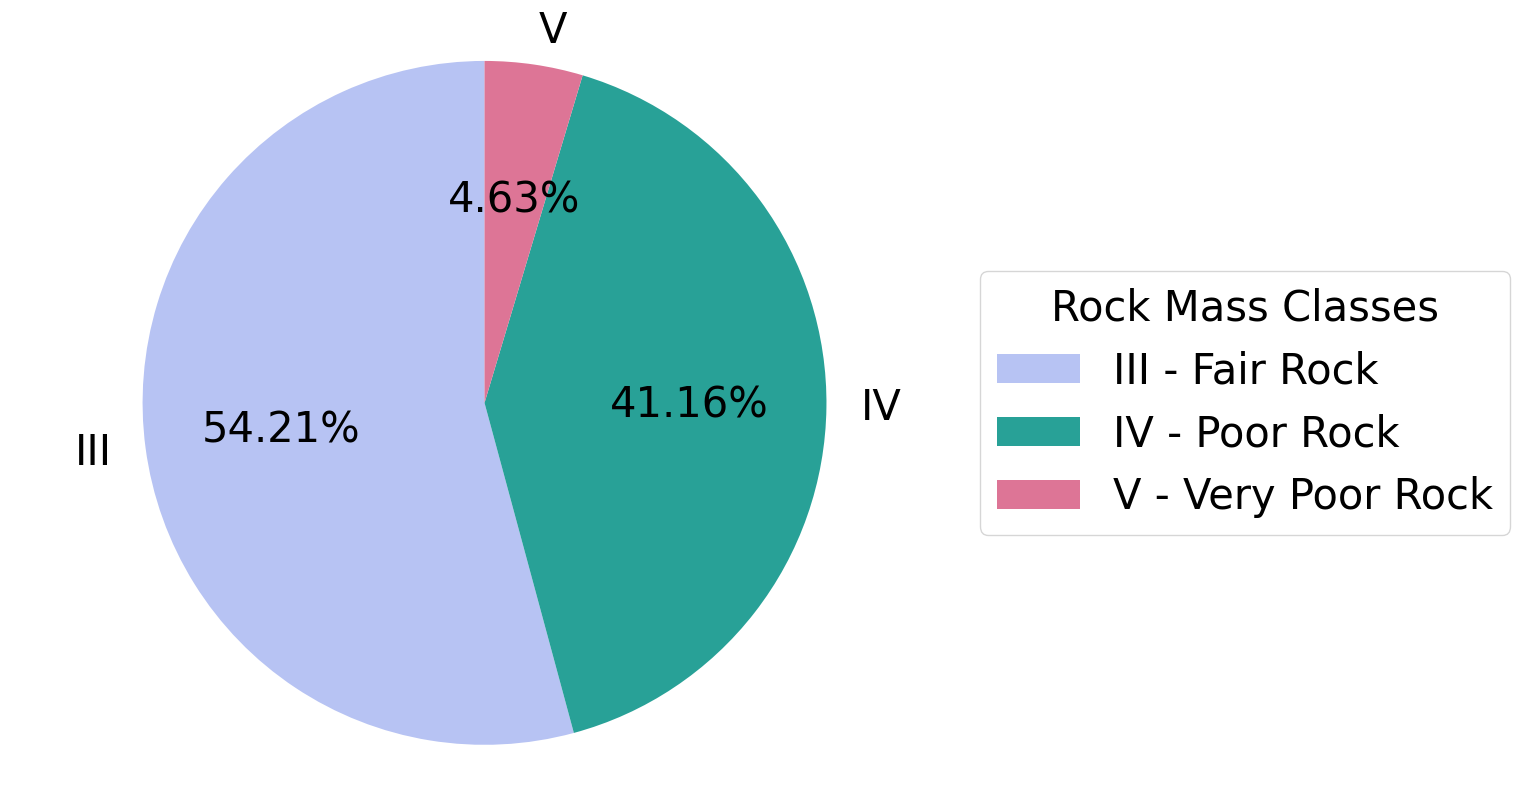

In [ ]:
#For Rock mass Class
# Define the function to classify the RMR values
def classify_rmr(rmr):
    if rmr < 21:
        return 'V'  # Very Poor Rock
    elif 21 <= rmr <= 40:
        return 'IV'  # Poor Rock
    elif 41 <= rmr <= 60:
        return 'III'  # Fair Rock
    else:
        return 'Other'  # If any other category is needed

# Apply the classification to the RMR column
data['Class'] = data['RMR'].apply(classify_rmr)

# Count occurrences of each class
class_counts = data['Class'].value_counts()

# Define custom colors for each class
colors = {
    'III': '#B7C3F3',   # Light Blue
    'IV': '#28A197',    # Teal
    'V': '#DD7596'      # Reddish Pink
}

# Define class labels for the legend
class_labels = {
    'III': "III - Fair Rock",
    'IV': "IV - Poor Rock",
    'V': "V - Very Poor Rock"
}

# Create the figure
plt.figure(figsize=(18, 8))

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    class_counts,
    labels=class_counts.index,
    colors=[colors.get(cls, 'gray') for cls in class_counts.index],
    autopct='%1.2f%%',  # Show percentages with two decimal places
    startangle=90,
    textprops={'fontsize': 30},
    explode=(0, 0, 0)  # No explosion effect
)

# Add a legend in the center-right
plt.legend(
    loc="center left",
    fontsize=30,
    title="Rock Mass Classes",
    title_fontsize=30,
    labels=[class_labels.get(cls, cls) for cls in class_counts.index],
    bbox_to_anchor=(1, 0.5),  # Position legend to the right
    borderaxespad=0.5,
)

# Ensure the chart is a circle and adjust layout
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.tight_layout(rect=[-0.1, 0, 0.75, 1])  # Adjust layout to move the pie chart slightly to the left

# Save the figure with high DPI
plt.savefig("pie_chart_center_right_legend.png", dpi=800)
plt.show()


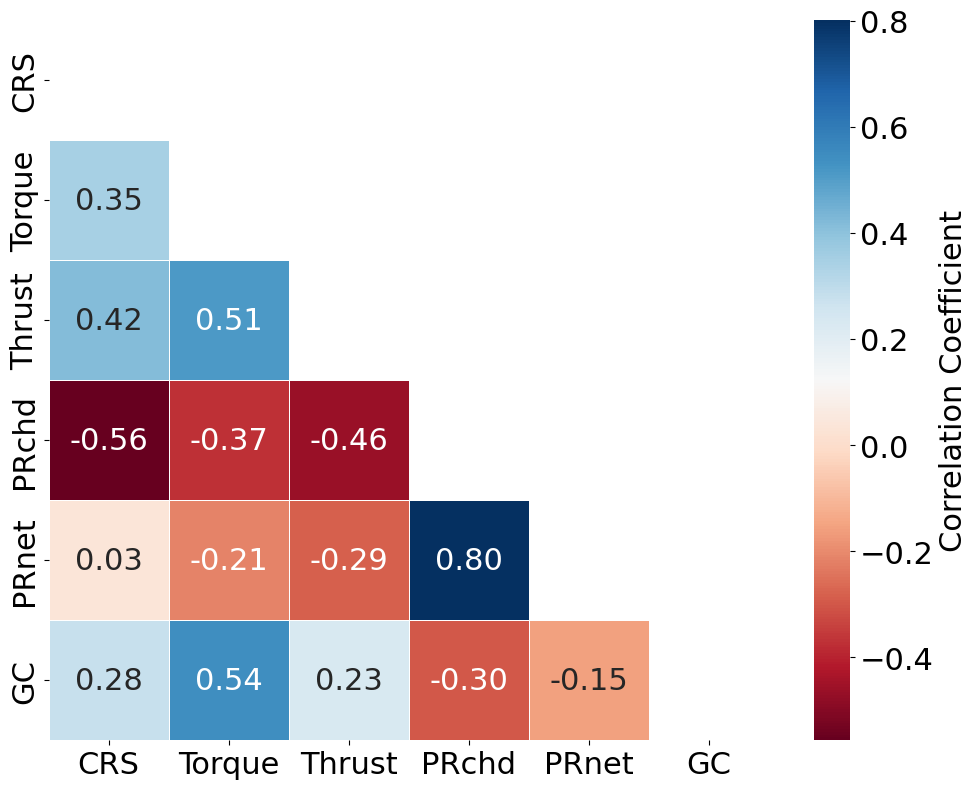

In [ ]:
# For ROCK MASS CLASS heatmap
# Rename column 'RMR' to 'GC' if it exists
if "RMR" in data.columns:
    data.rename(columns={"RMR": "GC"}, inplace=True)

# Load and preprocess data
columns_of_interest = ['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet', 'GC']

# Drop rows with missing values in the selected columns
data_cleaned = data[columns_of_interest].dropna()

# Compute Pearson correlation matrix
correlation_matrix = data_cleaned.corr()

# Generate an upper triangular mask for the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    cbar_kws={"label": "Correlation Coefficient"},
    square=True,
    mask=mask,
    linewidths=0.5,
    annot_kws={"size": 22}  # Font size of annotations
)

# Customize color bar font size
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label("Correlation Coefficient", fontsize=22)

# Customize axis labels and title
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("", fontsize=22)

# Save figure with high resolution
plt.tight_layout()
plt.savefig("heatmap_pearson_800dpi.png", dpi=800)
plt.show()


In [ ]:
# Change 0.00 in PRnet and CRS #ROCKMASS CLASS
# Create a sample correlation matrix (replace with your own data)
#data = {
#    'CRS': [1, 0.35, 0.45, -0.50, 0.01, 0.29],
#   'Torque': [0.35, 1, 0.50, -0.37, -0.21, 0.54],
#    'Thrust': [0.45, 0.50, 1, -0.46, -0.28, 0.25],
#    'PRchd': [-0.50, -0.37, -0.46, 1, 0.72, -0.29],
#    'PRnet': [0.01, -0.21, -0.28, 0.72, 1, -0.15],
#    'GC': [0.29, 0.54, 0.25, -0.29, -0.15, 1]
#}

# Convert to a DataFrame
#df = pd.DataFrame(data, index=['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet', 'GC'])

# Generate a heatmap
#plt.figure(figsize=(10, 8))
#heatmap = sns.heatmap(df, annot=True, fmt=".2f", cmap="RdBu",
#                      cbar_kws={"label": "Correlation Coefficient"},
#                      square=True, mask=np.triu(np.ones(df.shape)), linewidths=0.5,
#                      annot_kws={"size": 22})  # Annotation font size

# Set color bar font size
#colorbar = heatmap.collections[0].colorbar
#colorbar.ax.tick_params(labelsize=22)  # Set font size of color bar tick labels
#colorbar.set_label("Correlation Coefficient", fontsize=22)  # Set label font size

# Set the labels and title with font size 16
#plt.xticks(fontsize=22)
#plt.yticks(fontsize=22)
#plt.title(" ", fontsize=22)

# Save the figure with 800 DPI
#plt.tight_layout()
#plt.savefig("heatmap_pearson_800dpi.png", dpi=800)  # Save as 800 DPI
#plt.show()

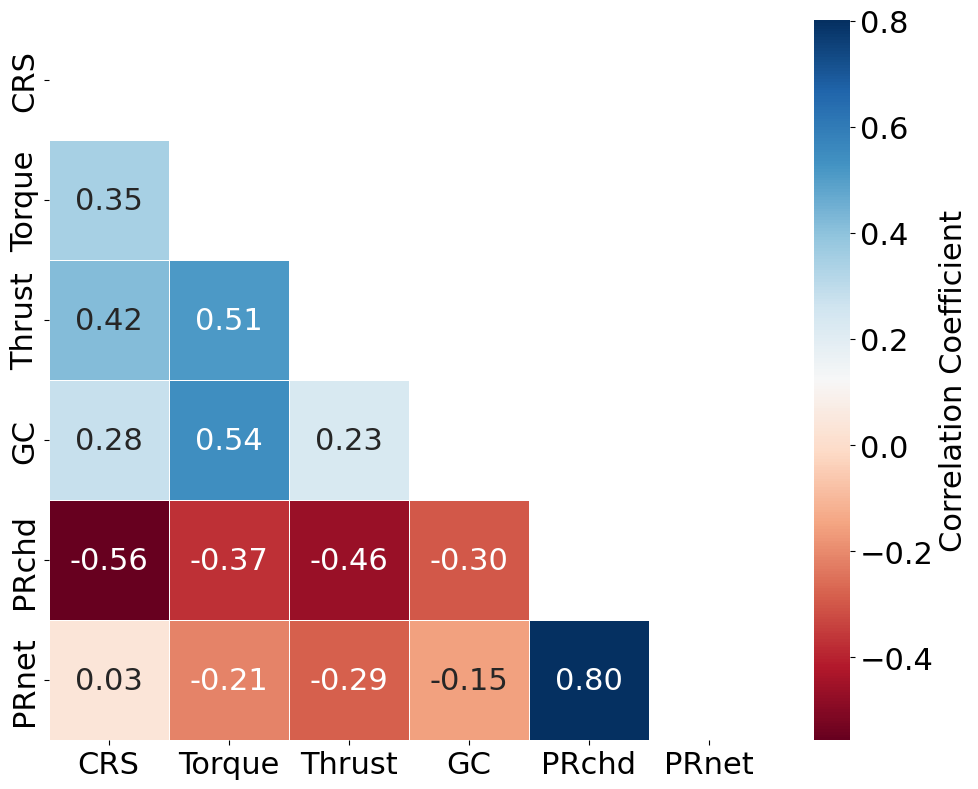

In [ ]:
# For NET PENETRATION RATE
# Load and preprocess data
columns_of_interest = ['CRS', 'Torque', 'Thrust', 'GC', 'PRchd', 'PRnet'] #As RMR has been renamed as GC in earlier step.

# Drop rows with missing values in the selected columns
data_cleaned = data[columns_of_interest].dropna()

# Compute Pearson correlation matrix
correlation_matrix = data_cleaned.corr()

# Generate an upper triangular mask for the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    cbar_kws={"label": "Correlation Coefficient"},
    square=True,
    mask=mask,
    linewidths=0.5,
    annot_kws={"size": 22}  # Font size of annotations
)

# Customize color bar font size
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label("Correlation Coefficient", fontsize=22)

# Customize axis labels and title
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("", fontsize=22)

# Save figure with high resolution
plt.tight_layout()
plt.savefig("heatmap_pearson_800dpi.png", dpi=800)
plt.show()


In [ ]:
# Change 0.00 in PRnet and CRS #PENETRATION RATE
# Create a sample correlation matrix (replace with your own data)
#data = {
#    'CRS': [1, 0.35, 0.45, 0.29, -0.50, 0.01],
#    'Torque': [0.35, 1, 0.50, 0.54, -0.37, -0.21],
#    'Thrust': [0.45, 0.50, 1, 0.25, -0.46, -0.28],
#     'GC': [0.29, 0.54, 0.25, 1, -0.29, -0.15],
#    'PRchd': [-0.50, -0.37, -0.46, -0.29, 1, 0.72],
#    'PRnet': [0.01, -0.21, -0.28, -0.15, 0.72, 1],
#}

# Convert to a DataFrame
#df = pd.DataFrame(data, index=['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet', 'GC'])

# Generate a heatmap
#plt.figure(figsize=(10, 8))
#heatmap = sns.heatmap(df, annot=True, fmt=".2f", cmap="RdBu",
#                      cbar_kws={"label": "Correlation Coefficient"},
#                      square=True, mask=np.triu(np.ones(df.shape)), linewidths=0.5,
#                      annot_kws={"size": 22})  # Annotation font size

# Set color bar font size
#colorbar = heatmap.collections[0].colorbar
#colorbar.ax.tick_params(labelsize=22)  # Set font size of color bar tick labels
#colorbar.set_label("Correlation Coefficient", fontsize=22)  # Set label font size

# Set the labels and title with font size 16
#plt.xticks(fontsize=22)
#plt.yticks(fontsize=22)
#plt.title(" ", fontsize=22)

# Save the figure with 800 DPI
#plt.tight_layout()
#plt.savefig("heatmap_pearson_800dpi.png", dpi=800)  # Save as 800 DPI
#plt.show()

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (91801110 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


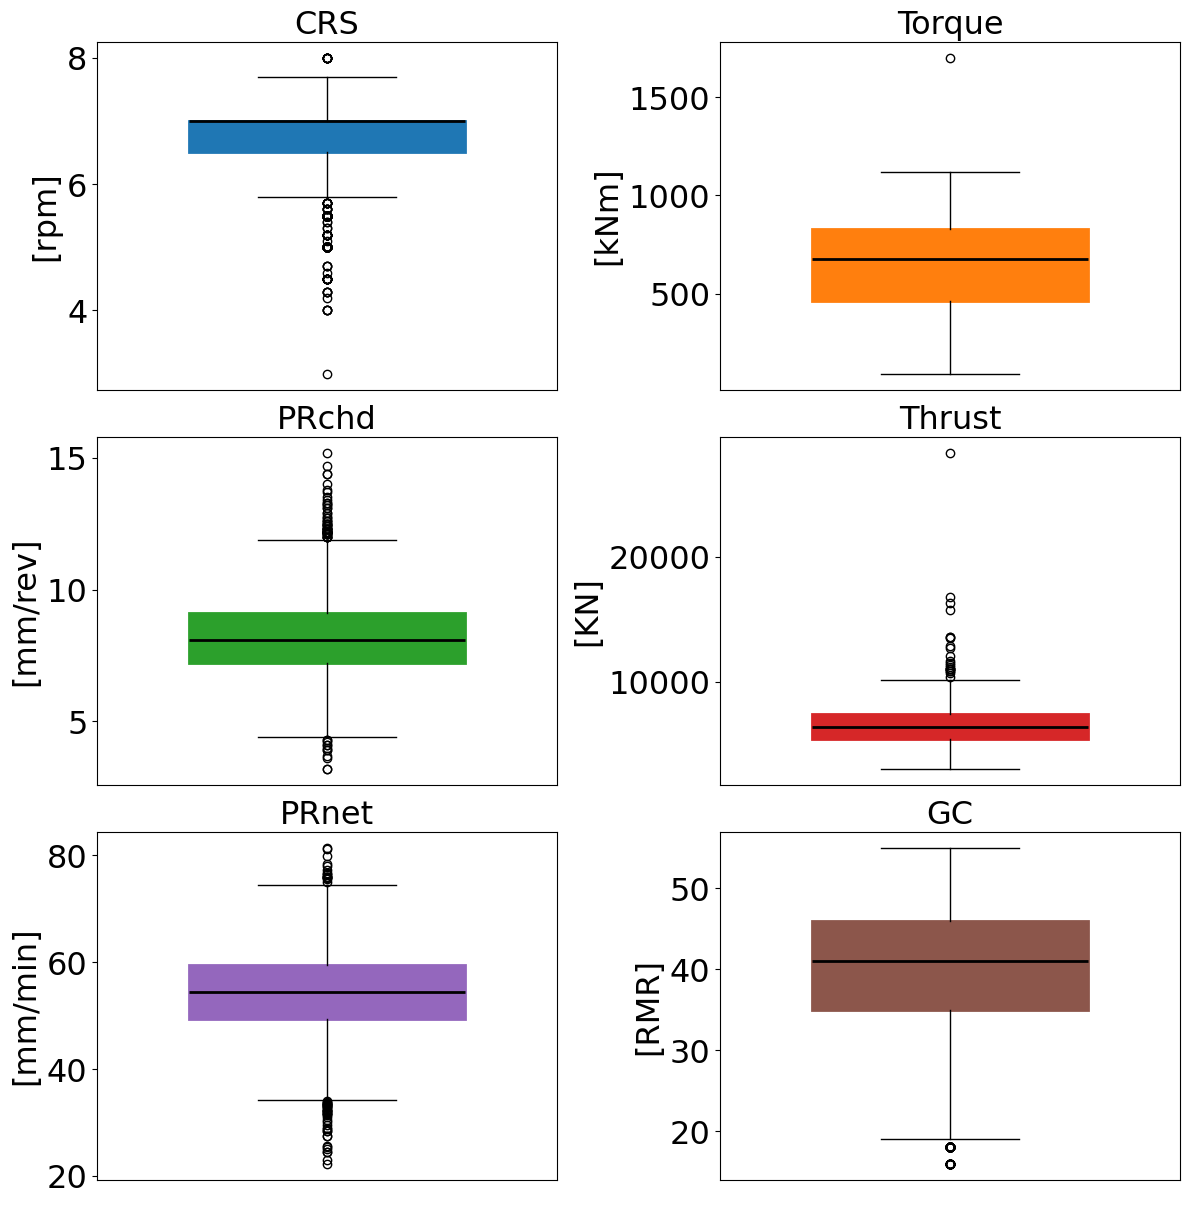

In [ ]:
#For Box Plot
# Define relevant columns, units, and colors
columns = ["CRS", "Torque", "PRchd", "Thrust", "PRnet", "GC"]
units = ["[rpm]", "[kNm]", "[mm/rev]", "[KN]", "[mm/min]", "[RMR]"]  # Updated unit for GC
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Create a 3x2 grid of boxplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12), dpi=100)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Generate boxplots for each column
for i, (col, unit, color) in enumerate(zip(columns, units, colors)):
    axes[i].boxplot(data[col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor=color, color=color, linewidth=2),
                    medianprops=dict(color='black', linewidth=2),
                    widths=0.6)  # Adjust box width
    axes[i].set_title(col, fontsize=23)  # Title
    axes[i].set_ylabel(unit, fontsize=23)  # Y-axis label
    axes[i].tick_params(axis='y', labelsize=23)  # Y-axis tick size
    axes[i].set_xticks([])  # Remove x-tick labels

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Save the plot to a file with 800 DPI
plot_file_path = 'boxplot_800dpi.png'
plt.tight_layout()  # Adjust layout
plt.savefig(plot_file_path, dpi=800, bbox_inches='tight')  # Save with 800 DPI

# Load and display the saved image
img = Image.open(plot_file_path)
img.show()


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (136140353 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


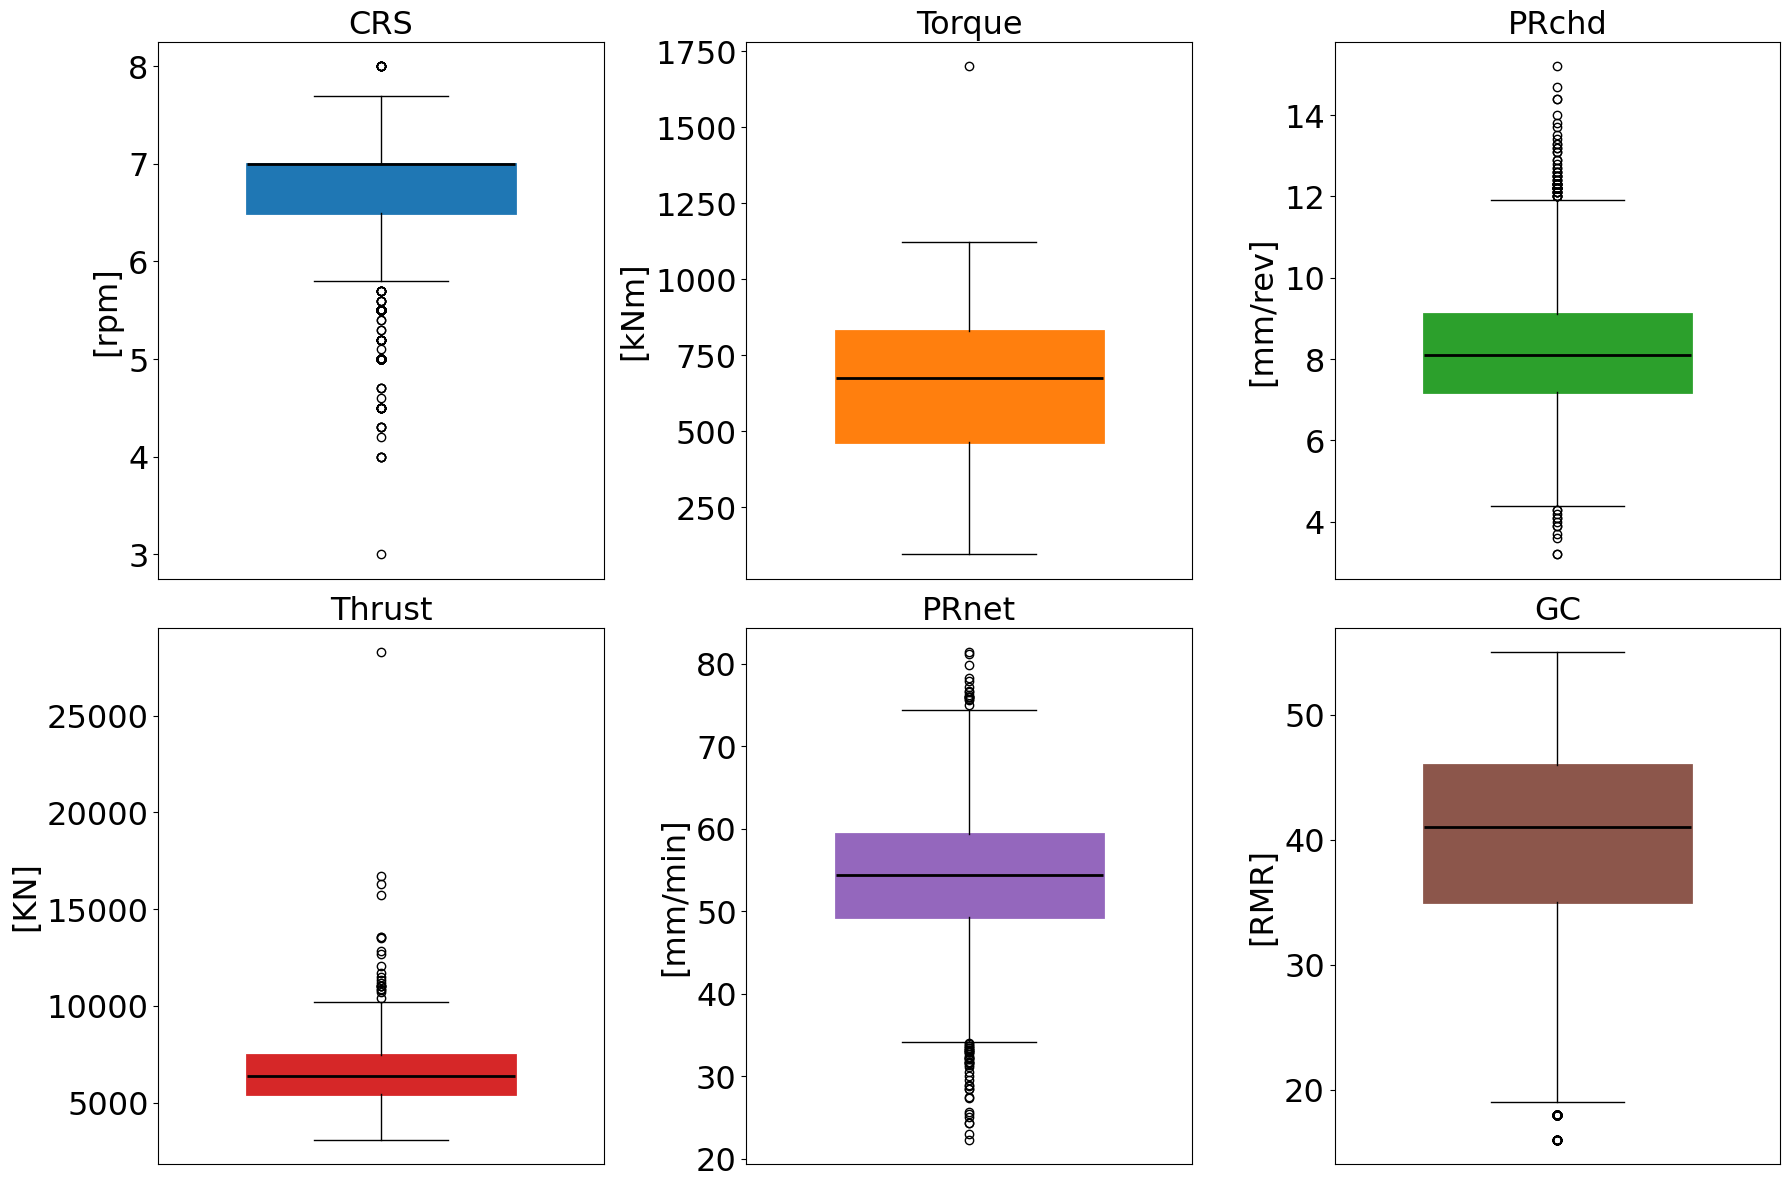

In [ ]:
# Define relevant columns, units, and colors
columns = ["CRS", "Torque", "PRchd", "Thrust", "PRnet", "GC"]
units = ["[rpm]", "[kNm]", "[mm/rev]", "[KN]", "[mm/min]", "[RMR]"]  # Updated unit for GC
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# **Create a 3x2 grid of boxplots**
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=100)  # Adjusted for 2x3 grid
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Generate boxplots for each column
for i, (col, unit, color) in enumerate(zip(columns, units, colors)):
    axes[i].boxplot(data[col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor=color, color=color, linewidth=2),
                    medianprops=dict(color='black', linewidth=2),
                    widths=0.6)  # Adjust box width
    axes[i].set_title(col, fontsize=23)  # Title
    axes[i].set_ylabel(unit, fontsize=23)  # Y-axis label
    axes[i].tick_params(axis='y', labelsize=23)  # Y-axis tick size
    axes[i].set_xticks([])  # Remove x-tick labels

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Save the plot to a file with 800 DPI
plot_file_path = 'boxplot_800dpi.png'
plt.tight_layout()  # Adjust layout
plt.savefig(plot_file_path, dpi=800, bbox_inches='tight')  # Save with 800 DPI

# Load and display the saved image
img = Image.open(plot_file_path)
img.show()

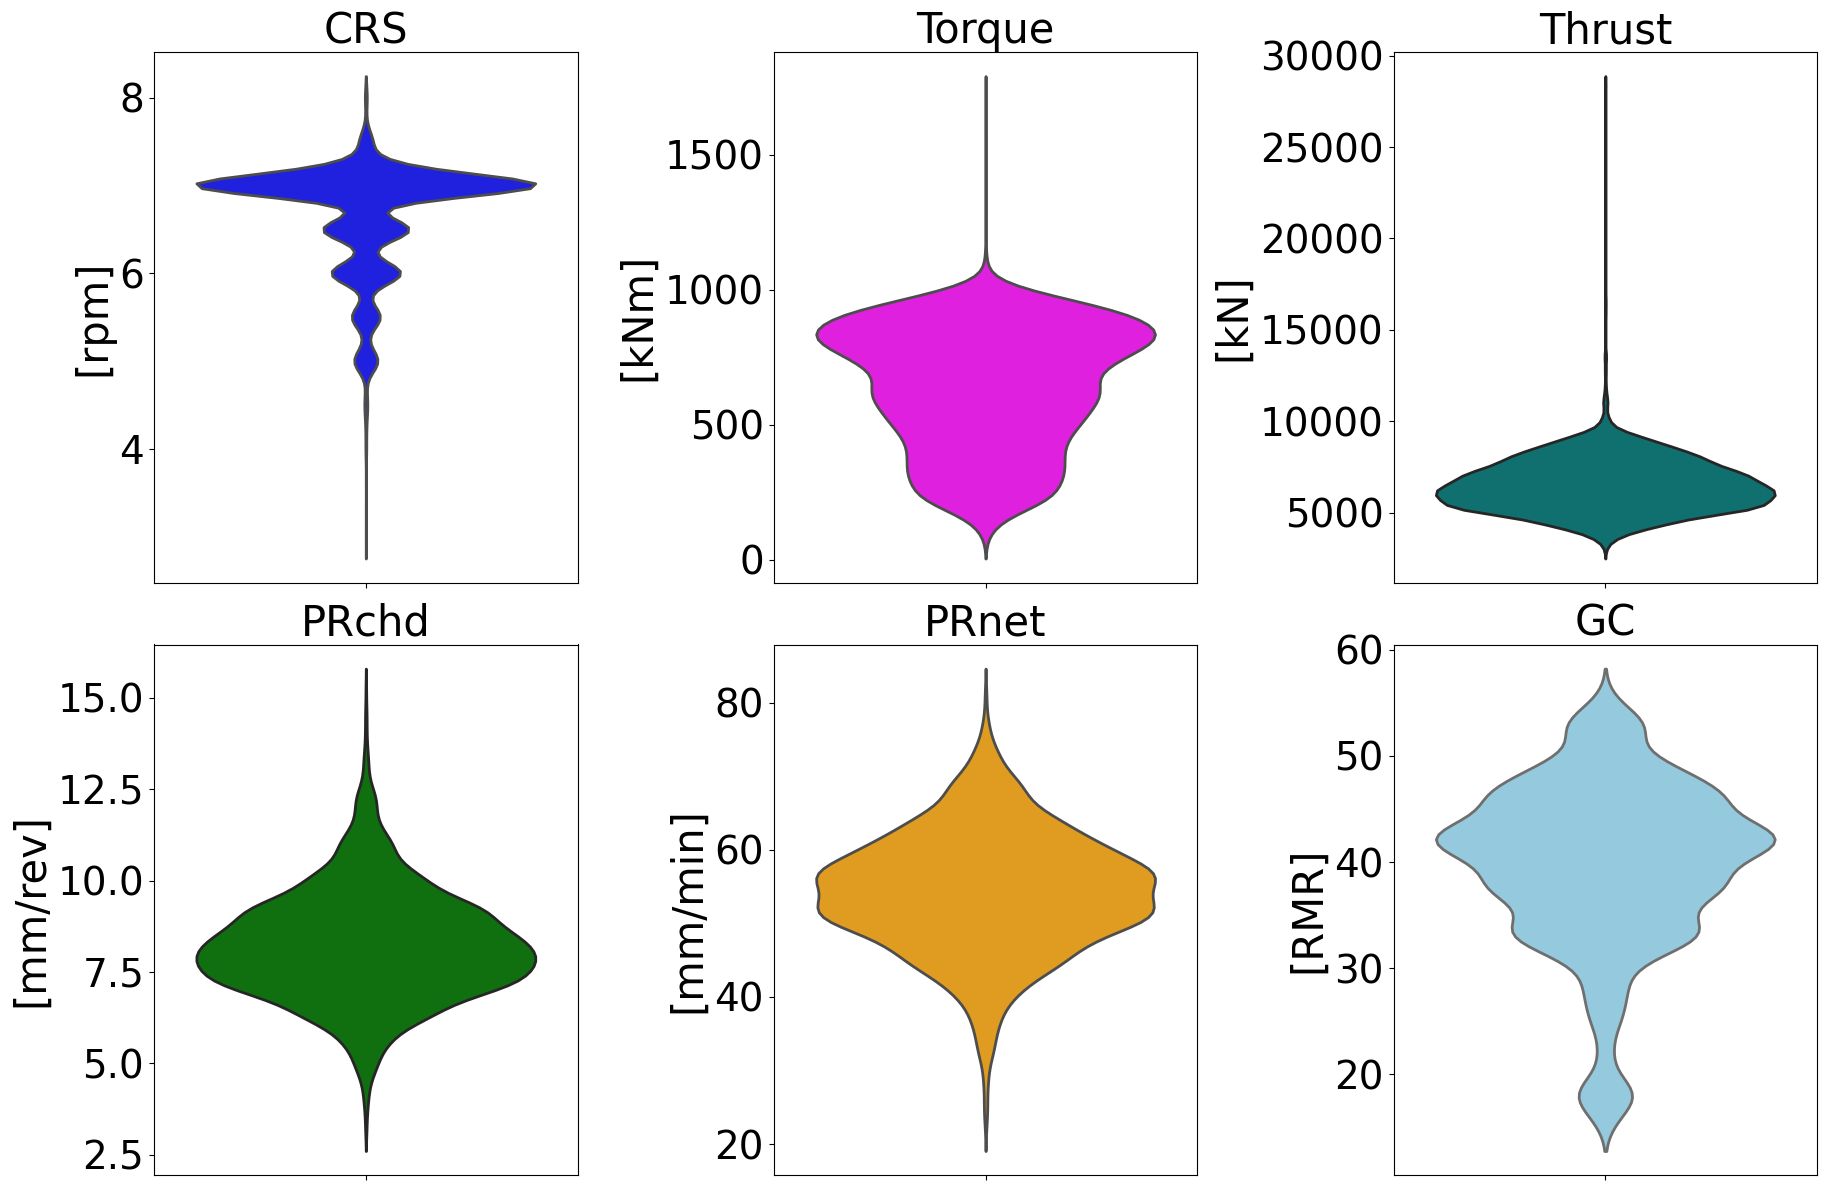

In [ ]:
#FOR VIOLIN PLOT

# **Rename 'RMR' to 'GC' in the dataset**
#data = data.rename(columns={'RMR': 'GC'}) #already in previous step

# **Define figure and axes for subplots**
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=100)  # Adjusted size for better spacing
axes = axes.flatten()  # Flatten for easy iteration

# **Updated order of variables and their units**
variables = ['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet', 'GC']  # 'GC' instead of 'RMR'
units = ['[rpm]', '[kNm]', '[kN]', '[mm/rev]', '[mm/min]', '[RMR]']  # Kept unit as '[RMR]'

# **Custom colors for each violin plot**
violin_colors = ['blue', 'magenta', 'teal', 'green', 'orange', 'skyblue']

# **Plot violin plots for each variable**
for i, (var, unit, color) in enumerate(zip(variables, units, violin_colors)):
    sns.violinplot(
        data=data,
        y=var,
        ax=axes[i],
        color=color,
        inner=None,  # Remove inner box for a clean violin plot
        linewidth=2  # Adjust line width for better visibility
    )

    # **Set title and axis labels with correct font sizes**
    axes[i].set_title(f'{var}', fontsize=30)  # Title for each subplot
    axes[i].set_xlabel('', fontsize=30)  # No X-axis label
    axes[i].set_ylabel(unit, fontsize=30)  # Y-axis label with correct font size

    # **Customize ticks**
    axes[i].tick_params(axis='y', labelsize=28)  # Y-axis tick labels

# **Adjust layout for better spacing**
plt.tight_layout()

# **Save the figure with high DPI**
plt.savefig("violin_plot_800dpi.png", dpi=800, bbox_inches='tight')

# **Show the plot**
plt.show()


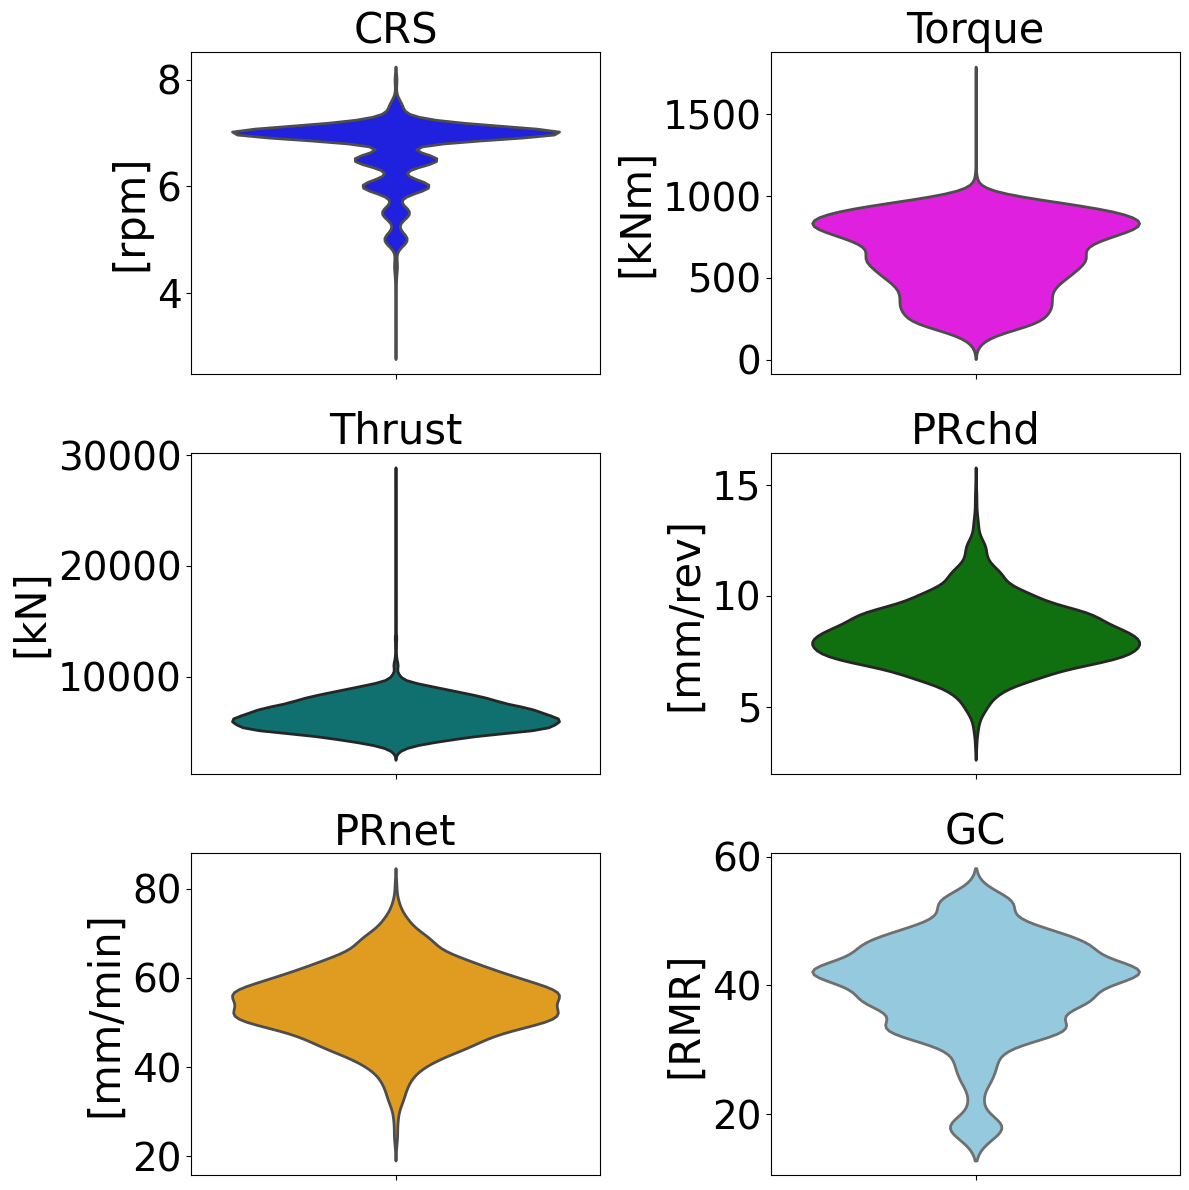

In [ ]:
# **Rename 'RMR' to 'GC' in the dataset**
#data = data.rename(columns={'RMR': 'GC'})

# **Define figure and axes for subplots (3 rows, 2 columns)**
fig, axes = plt.subplots(3, 2, figsize=(12, 12), dpi=100)  # Adjusted figure size for 3x2 grid
axes = axes.flatten()  # Flatten for easy iteration

# **Updated order of variables and their units**
variables = ['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet', 'GC']  # 'GC' instead of 'RMR'
units = ['[rpm]', '[kNm]', '[kN]', '[mm/rev]', '[mm/min]', '[RMR]']  # Kept unit as '[RMR]'

# **Custom colors for each violin plot**
violin_colors = ['blue', 'magenta', 'teal', 'green', 'orange', 'skyblue']

# **Plot violin plots for each variable**
for i, (var, unit, color) in enumerate(zip(variables, units, violin_colors)):
    sns.violinplot(
        data=data,
        y=var,
        ax=axes[i],
        color=color,
        inner=None,  # Remove inner box for a clean violin plot
        linewidth=2  # Adjust line width for better visibility
    )

    # **Set title and axis labels with correct font sizes**
    axes[i].set_title(f'{var}', fontsize=30)  # Title (without bold)
    axes[i].set_xlabel('', fontsize=30)  # No X-axis label
    axes[i].set_ylabel(unit, fontsize=30)  # Y-axis label with correct font size

    # **Customize ticks**
    axes[i].tick_params(axis='y', labelsize=28)  # Y-axis tick labels

# **Adjust layout for better spacing**
plt.tight_layout()

# **Save the figure with high DPI**
plt.savefig("violin_plot_800dpi.png", dpi=800, bbox_inches='tight')

# **Show the plot**
plt.show()


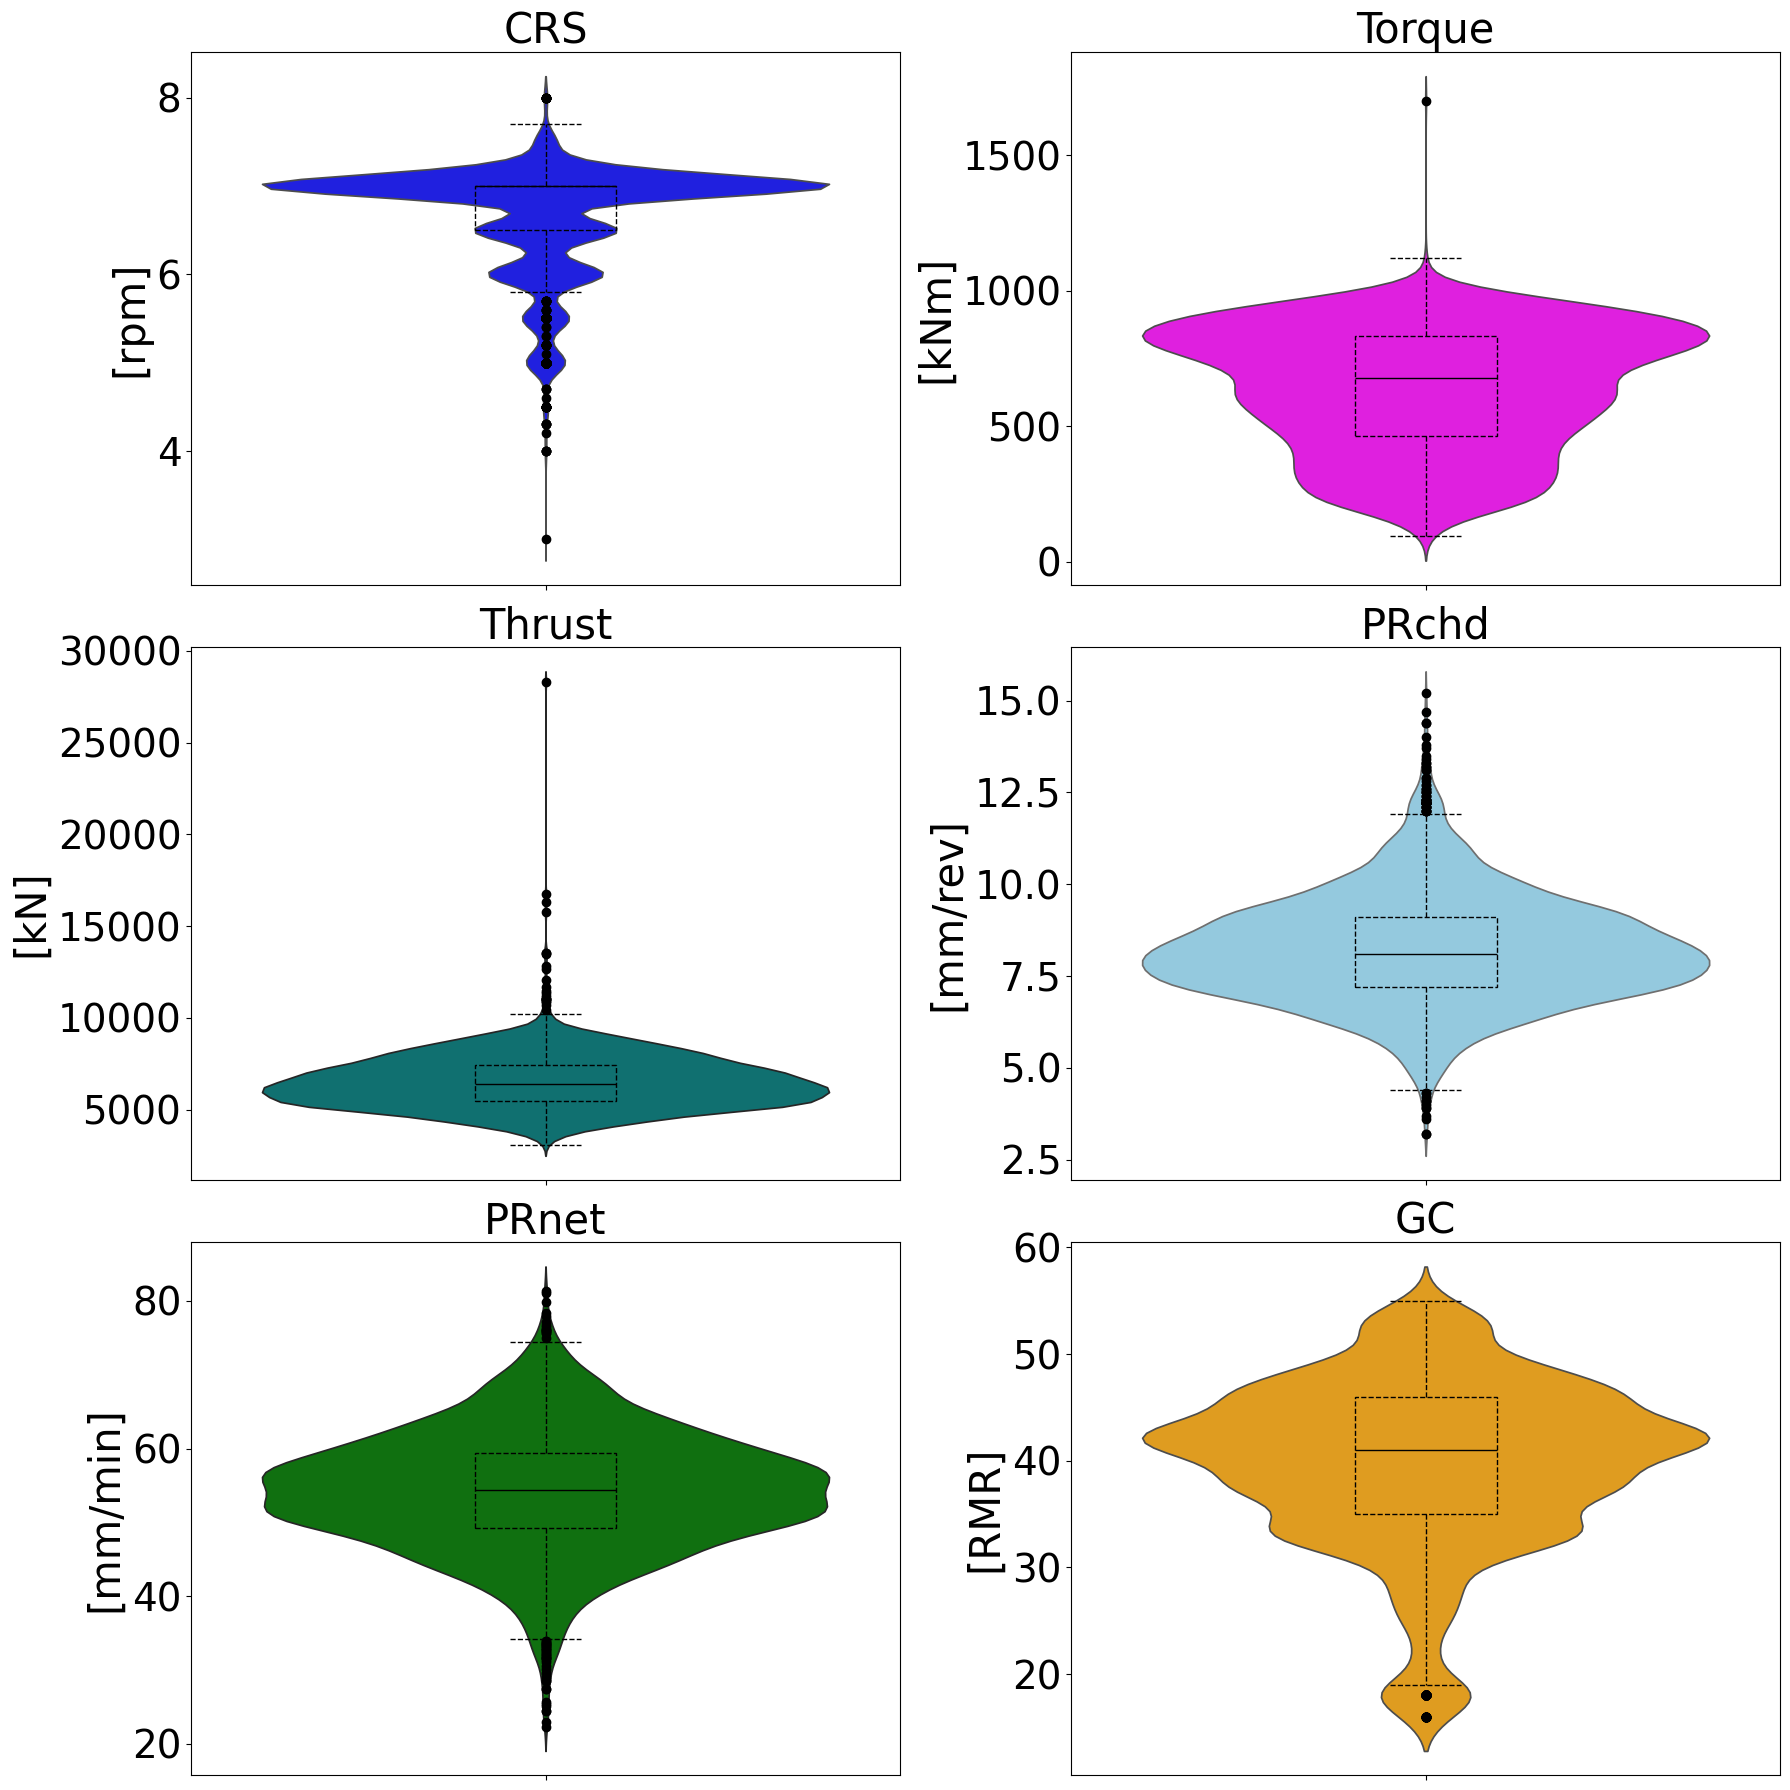

In [ ]:
#For Box and Violin Plot Combined
# **Define figure and axes for subplots (3 rows, 2 columns)**
fig, axes = plt.subplots(3, 2, figsize=(18, 18), dpi=100)  # Adjusted figure size for 3x2 grid
axes = axes.flatten()  # Flatten for easy iteration

# **Updated order of variables and their units**
variables = ['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet', 'GC']  # 'GC' instead of 'RMR'
units = ['[rpm]', '[kNm]', '[kN]', '[mm/rev]', '[mm/min]', '[RMR]']  # Kept unit as '[RMR]'

# **Custom colors for each violin plot**
violin_colors = ['blue', 'magenta', 'teal', 'skyblue', 'green', 'orange']

# **Plot combined violin and box plots for each variable**
for i, (var, unit, color) in enumerate(zip(variables, units, violin_colors)):
    # Violin plot (color-filled)
    sns.violinplot(
        data=data,
        y=var,
        ax=axes[i],
        color=color,
        inner=None  # No internal box for clean visualization
    )

    # Box plot (overlaid with dashed lines)
    sns.boxplot(
        data=data,
        y=var,
        ax=axes[i],
        width=0.2,
        boxprops=dict(facecolor='none', edgecolor='black', linestyle='--'),  # Dashed box lines
        whiskerprops=dict(color='black', linestyle='--'),  # Dashed whiskers
        capprops=dict(color='black', linestyle='--'),  # Dashed caps
        medianprops=dict(color='black'),  # Solid line for median
        flierprops=dict(markerfacecolor='black', markeredgecolor='black')  # Outliers
    )

    # **Set title and axis labels with correct font sizes**
    axes[i].set_title(f'{var}', fontsize=30)  # Title (without bold)
    axes[i].set_xlabel('', fontsize=30)  # No X-axis label
    axes[i].set_ylabel(unit, fontsize=30)  # Y-axis label with correct font size

    # **Customize ticks**
    axes[i].tick_params(axis='y', labelsize=28)  # Y-axis tick labels

# **Adjust layout for better spacing**
plt.tight_layout()

# **Save the figure with high DPI**
plt.savefig("violin_box_plot_800dpi.png", dpi=800, bbox_inches='tight')

# **Show the plot**
plt.show()


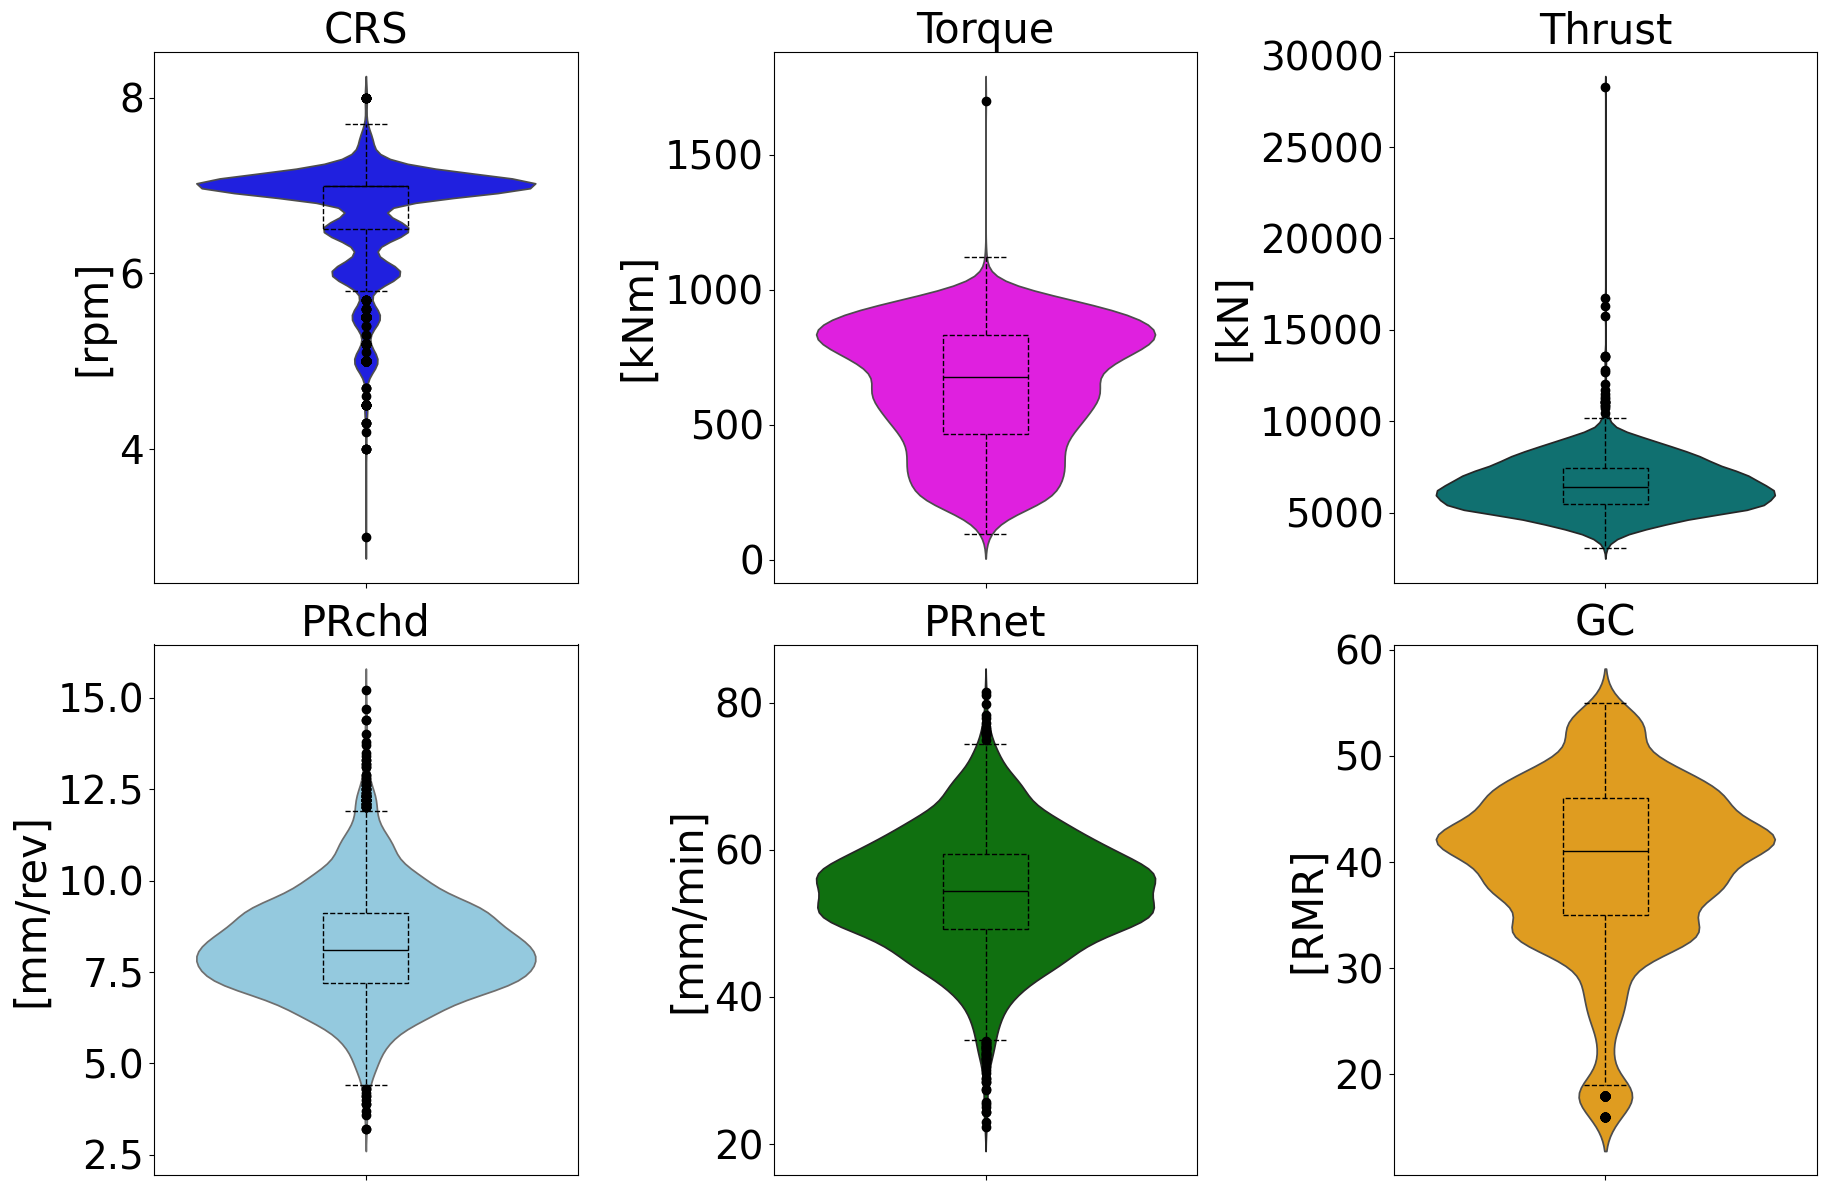

In [ ]:
#BOX AND VIOLIN PLOT COMBINED
# **Define figure and axes for subplots (2 rows, 3 columns)**
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=100)  # Adjusted figure size for 2x3 grid
axes = axes.flatten()  # Flatten for easy iteration

# **Updated order of variables and their units**
variables = ['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet', 'GC']  # 'GC' instead of 'RMR'
units = ['[rpm]', '[kNm]', '[kN]', '[mm/rev]', '[mm/min]', '[RMR]']  # Kept unit as '[RMR]'

# **Custom colors for each violin plot**
violin_colors = ['blue', 'magenta', 'teal', 'skyblue', 'green', 'orange']

# **Plot combined violin and box plots for each variable**
for i, (var, unit, color) in enumerate(zip(variables, units, violin_colors)):
    # Violin plot (color-filled)
    sns.violinplot(
        data=data,
        y=var,
        ax=axes[i],
        color=color,
        inner=None  # No internal box for clean visualization
    )

    # Box plot (overlaid with dashed lines)
    sns.boxplot(
        data=data,
        y=var,
        ax=axes[i],
        width=0.2,
        boxprops=dict(facecolor='none', edgecolor='black', linestyle='--'),  # Dashed box lines
        whiskerprops=dict(color='black', linestyle='--'),  # Dashed whiskers
        capprops=dict(color='black', linestyle='--'),  # Dashed caps
        medianprops=dict(color='black'),  # Solid line for median
        flierprops=dict(markerfacecolor='black', markeredgecolor='black')  # Outliers
    )

    # **Set title and axis labels with correct font sizes**
    axes[i].set_title(f'{var}', fontsize=30)  # Title (without bold)
    axes[i].set_xlabel('', fontsize=30)  # No X-axis label
    axes[i].set_ylabel(unit, fontsize=30)  # Y-axis label with correct font size

    # **Customize ticks**
    axes[i].tick_params(axis='y', labelsize=28)  # Y-axis tick labels

# **Adjust layout for better spacing**
plt.tight_layout()

# **Save the figure with high DPI**
plt.savefig("violin_box_plot_800dpi.png", dpi=800, bbox_inches='tight')

# **Show the plot**
plt.show()


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (176386450 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


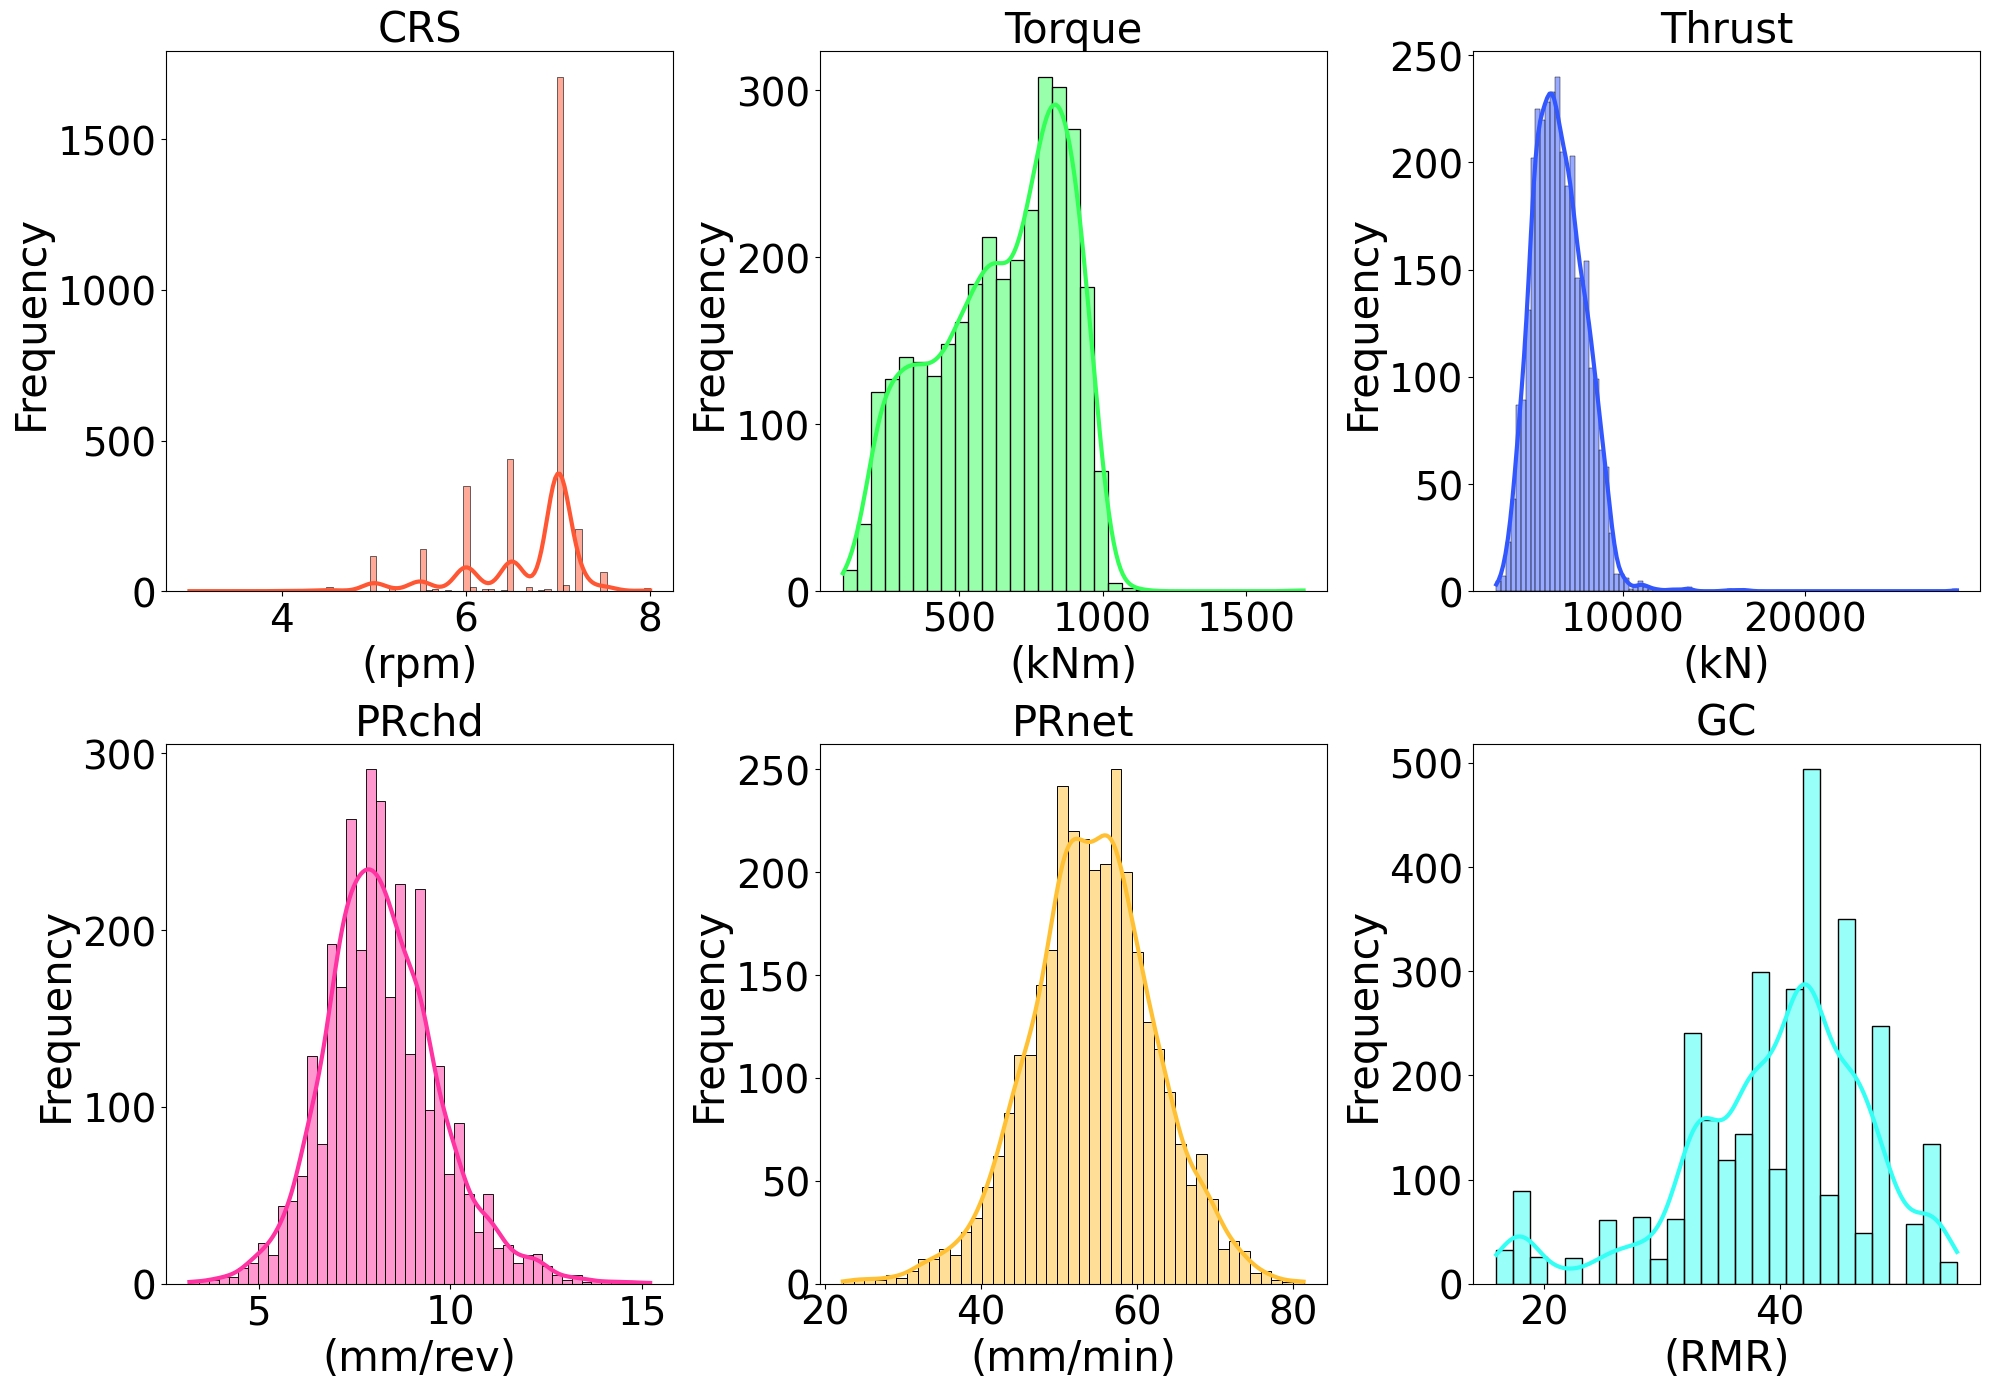

In [ ]:
#HISTOGRAM WITH KDE

# **Extracting the relevant columns in the correct order**
columns = ["CRS", "Torque", "Thrust", "PRchd", "PRnet", "GC"]  # GC remains unchanged
units = ["(rpm)", "(kNm)", "(kN)", "(mm/rev)", "(mm/min)", "(RMR)"]  # Kept the correct units
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FFC133", "#33FFF5"]  # Custom colors

# **Create a 2x3 grid of histograms with KDE**
fig, axes = plt.subplots(2, 3, figsize=(20, 14), dpi=100)  # Adjusted for 2x3 grid
axes = axes.flatten()

# **Plot each column in its respective subplot**
for i, col in enumerate(columns):
    sns.histplot(
        data[col].dropna(), kde=True, color=colors[i], ax=axes[i],
        line_kws={'color': '#000000', 'linewidth': 3}  # Darker and thicker KDE line
    )

    # **Set titles and axis labels with correct font sizes**
    axes[i].set_title(f"{col}", fontsize=30)  # Title
    axes[i].set_xlabel(units[i], fontsize=30)  # X-axis label
    axes[i].set_ylabel('Frequency', fontsize=30)  # Y-axis label

    # **Customize tick labels**
    axes[i].tick_params(axis='both', labelsize=28)

# **Adjust layout for better spacing**
plt.tight_layout()

# **Save the plot to a file with 800 DPI**
plot_file_path = 'histogram_kde_800dpi.png'
plt.savefig(plot_file_path, dpi=800, bbox_inches='tight')  # Save the figure with high resolution

# **Display the saved plot**
img = Image.open(plot_file_path)
img.show()


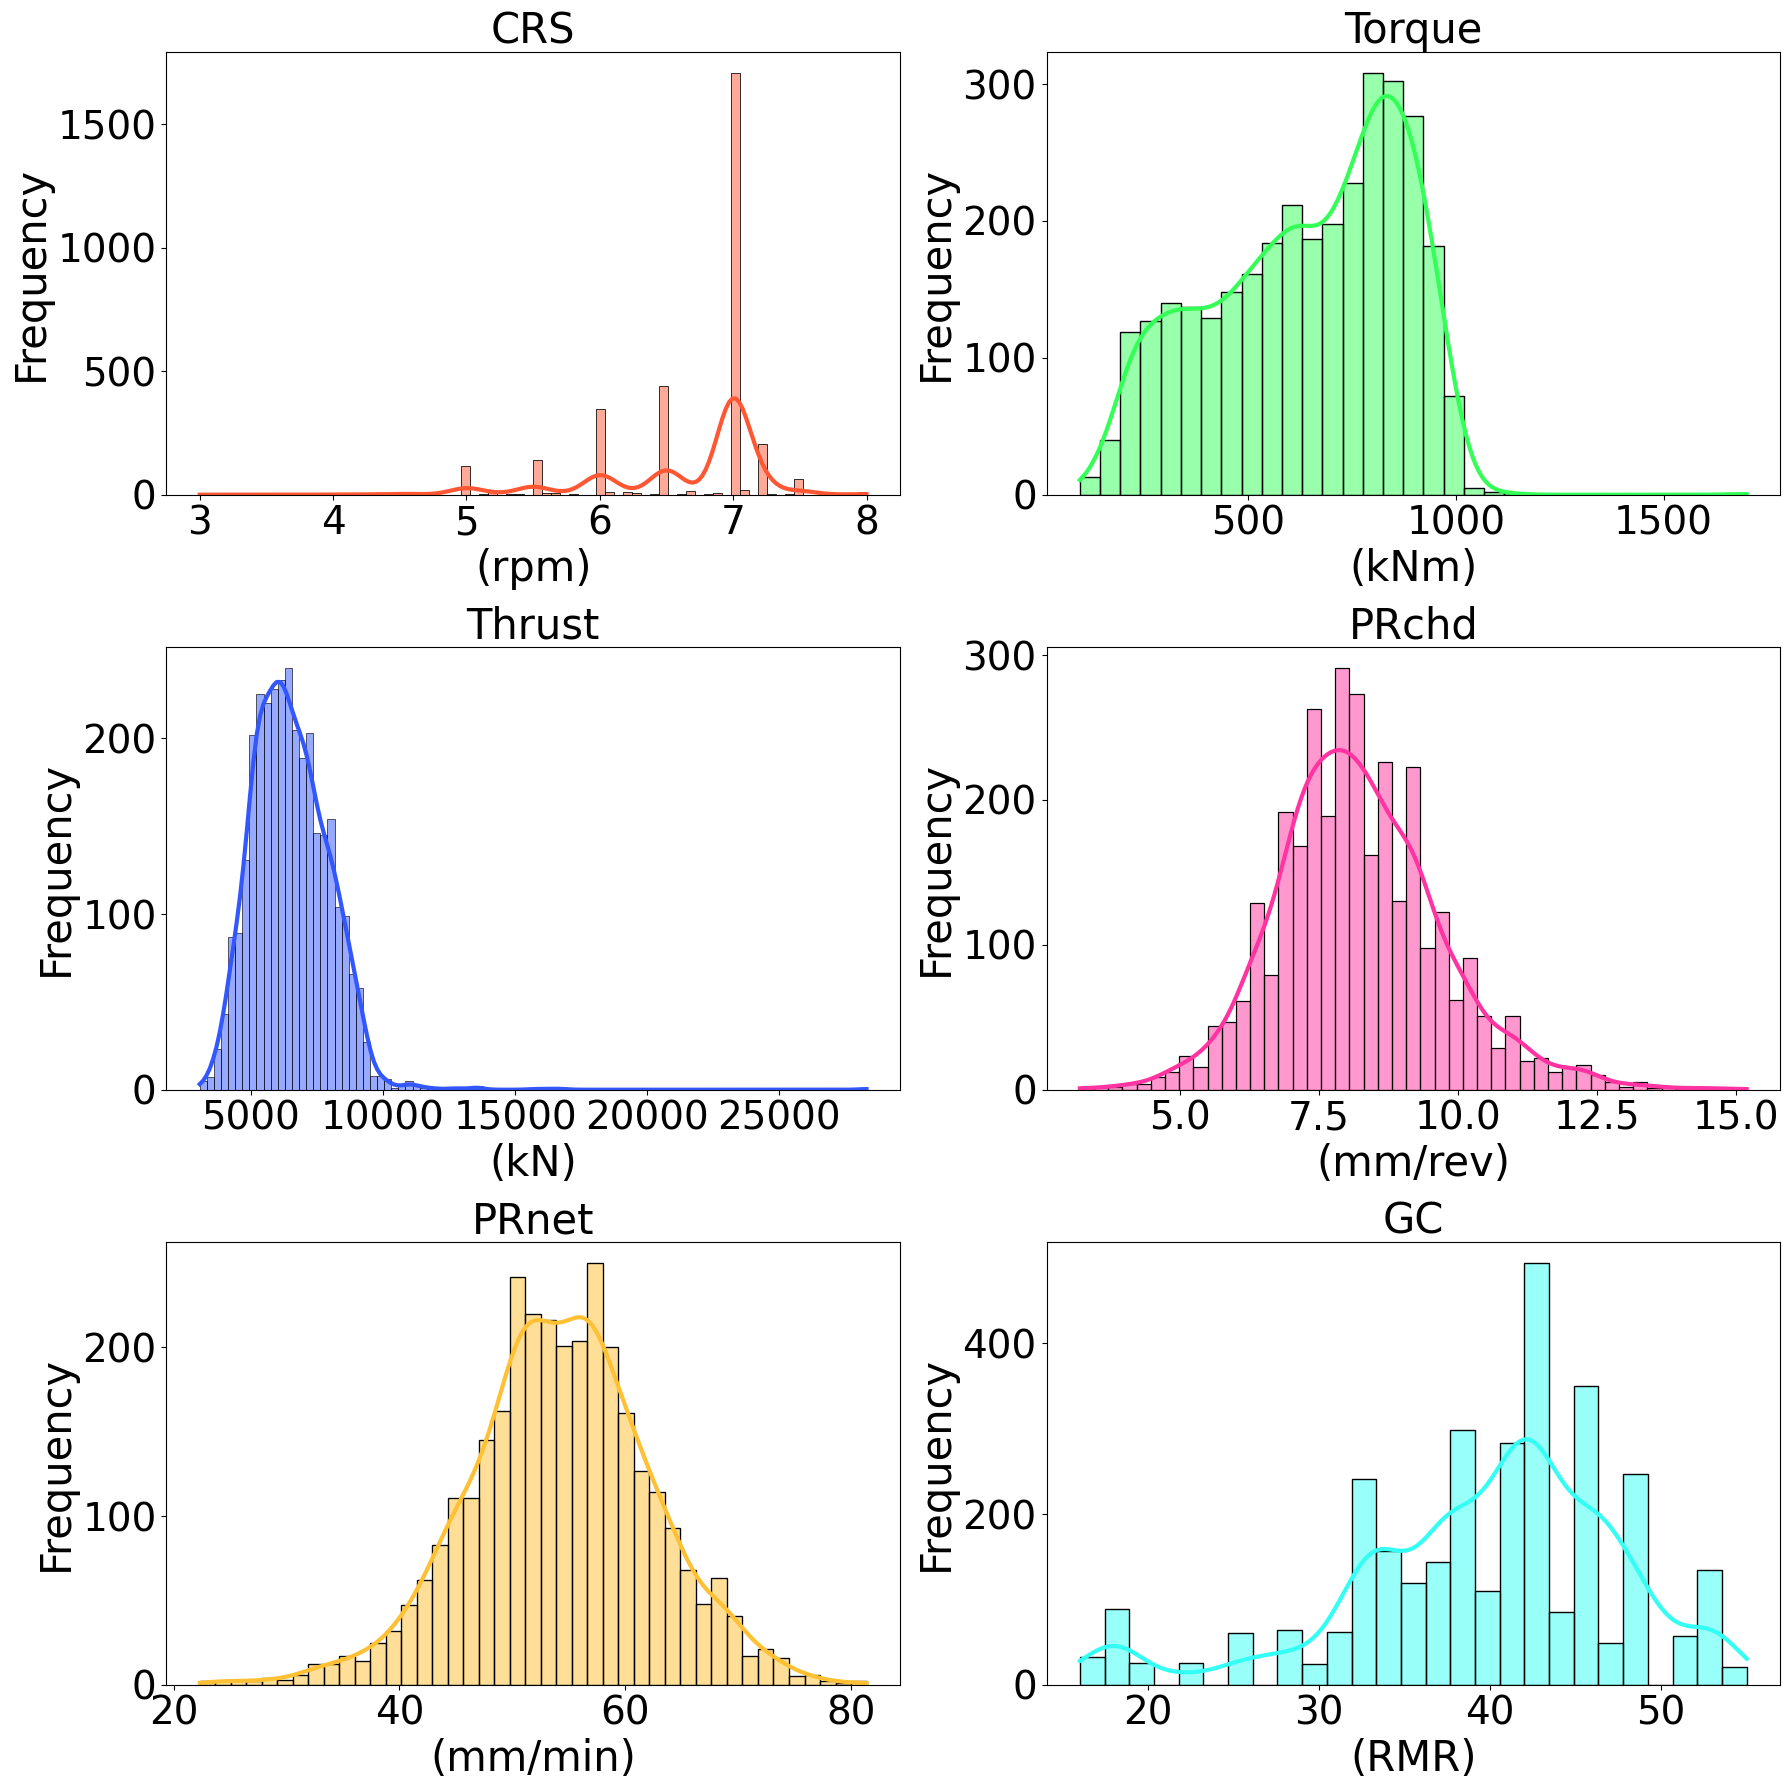

In [ ]:
#Histogram with KDE
# **Extracting the relevant columns in the correct order**
columns = ["CRS", "Torque", "Thrust", "PRchd", "PRnet", "GC"]  # GC remains unchanged
units = ["(rpm)", "(kNm)", "(kN)", "(mm/rev)", "(mm/min)", "(RMR)"]  # Kept the correct units
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FFC133", "#33FFF5"]  # Custom colors

# **Create a 3x2 grid of histograms with KDE**
fig, axes = plt.subplots(3, 2, figsize=(18, 18), dpi=100)  # Adjusted for 3x2 grid
axes = axes.flatten()

# **Plot each column in its respective subplot**
for i, col in enumerate(columns):
    sns.histplot(
        data[col].dropna(), kde=True, color=colors[i], ax=axes[i],
        line_kws={'color': '#000000', 'linewidth': 3}  # Darker and thicker KDE line
    )

    # **Set titles and axis labels with correct font sizes**
    axes[i].set_title(f"{col}", fontsize=30)  # Title
    axes[i].set_xlabel(units[i], fontsize=30)  # X-axis label
    axes[i].set_ylabel('Frequency', fontsize=30)  # Y-axis label

    # **Customize tick labels**
    axes[i].tick_params(axis='both', labelsize=28)

# **Adjust layout for better spacing**
plt.tight_layout()

# Increase PIL's limit for large images
Image.MAX_IMAGE_PIXELS = None

# **Save the plot to a file with 800 DPI**
plot_file_path = 'histogram_kde_800dpi.png'
plt.savefig(plot_file_path, dpi=800, bbox_inches='tight')  # Save the figure with high resolution

# **Display the saved plot**
img = Image.open(plot_file_path)
img.show()


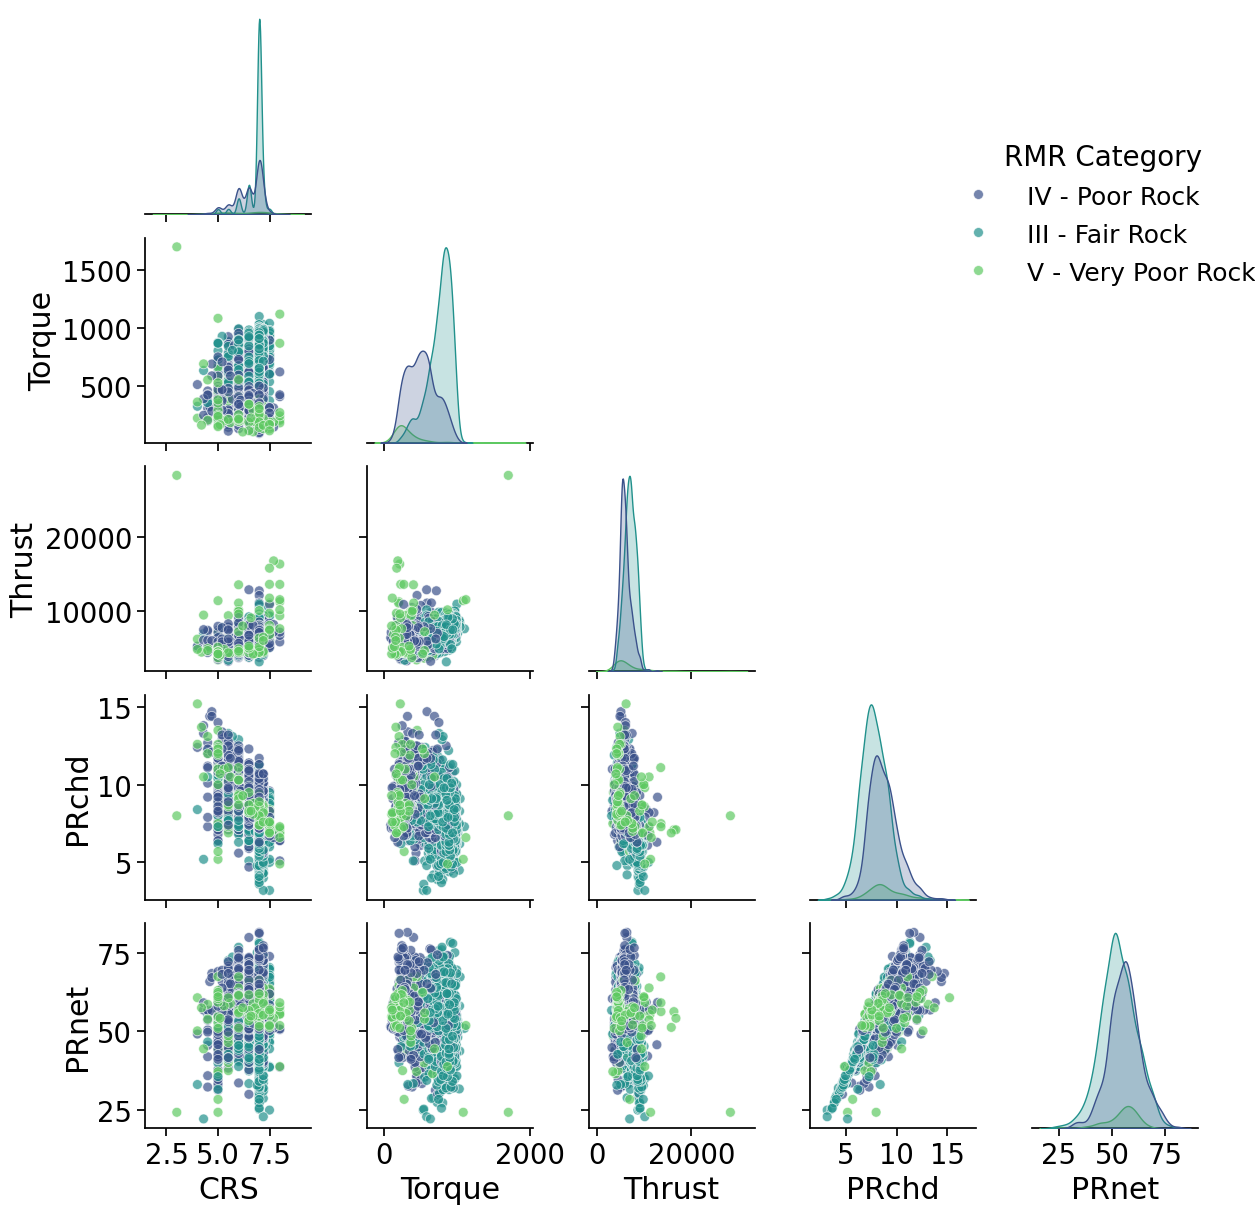

In [ ]:
##PAIR PLOT
# **Rename 'GC' back to 'RMR' for clarity (if needed)**
data = data.rename(columns={'GC': 'RMR'})

# **Set font scale for better readability**
sns.set_context("notebook", font_scale=1.8)  # Adjusts the overall font size in Seaborn plots

# **Define the function to classify the RMR values**
def classify_rmr(rmr):
    if rmr < 21:
        return 'V - Very Poor Rock'
    elif 21 <= rmr <= 40:
        return 'IV - Poor Rock'
    elif 41 <= rmr <= 60:
        return 'III - Fair Rock'
    else:
        return 'Other'  # If any other category is needed

# **Apply classification to the RMR column**
data['RMR Category'] = data['RMR'].apply(classify_rmr)

# **Define variables for the pair plot (without RMR)**
columns = ['CRS', 'Torque', 'Thrust', 'PRchd', 'PRnet']

# **Create a pair plot with a discrete palette**
pairplot = sns.pairplot(
    data=data,
    vars=columns,  # Numerical variables to plot
    diag_kind="kde",  # Use KDE for diagonal distributions
    hue="RMR Category",  # Use 'RMR Category' as color group
    palette="viridis",  # Color scheme
    corner=True,  # Show only lower triangle for symmetry
    plot_kws={"alpha": 0.7, "s": 50}  # Transparency & marker size
)

# **Modify legend to be inside a box with proper formatting**
legend = pairplot._legend  # Access the legend
legend.set_title("RMR Category")  # Set legend title
legend.get_frame().set_edgecolor("black")  # Add a black border around the box
legend.get_frame().set_linewidth(2)  # Make border thicker
legend.set_bbox_to_anchor((0.8, 0.8))  # Adjust legend position inside the plot
legend.get_title().set_fontsize(20)  # Set title font size
for text in legend.get_texts():
    text.set_fontsize(18)  # Set class font size

# **Add a title to the pair plot**
pairplot.fig.suptitle("", y=1.02, fontsize=24)

# **Save the figure with high DPI**
pairplot.savefig("pair_plot_1200dpi.png", dpi=1200)

# **Show the plot**
plt.show()
